In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../data/dataset1.csv")
df = df.drop("id", axis=1)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})
mean = np.mean(df, axis=0)
for i in range(1, df.shape[1]):
    df.iloc[:, i].fillna(mean[i - 1], inplace=True)

In [3]:
y = df["diagnosis"]
X = df.drop(["diagnosis"], axis=1)

In [4]:
X = df.drop(["diagnosis"], axis=1)
split_idx = int(len(df) * 0.67)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]
X.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
eps=0.00000000000001

In [6]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## Gradient Descent Implementation:

In [7]:
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, n_iters=1000, random_state=None,threshold=0.5):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.random_state = random_state
        self.threshold=threshold
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.costs = []
        
        # set random seed for reproducibility
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        # gradient descent
        for i in range(self.n_iters):
            # calculate predicted probabilities and gradients
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            dw = np.dot(X.T, (y_pred - y)) / n_samples
            db = np.sum(y_pred - y) / n_samples
            
            # update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # calculate cost and add to list for graphing
            y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
            y_pred[y_pred == 0] = 1e-15  # add small constant value to avoid NaN in cost
            y_pred[y_pred == 1] = 1 - 1e-15  # add small constant value to avoid NaN in cost
            cost = -1/n_samples * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
            self.costs.append(cost)
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        y_pred_class = [1 if i > self.threshold else 0 for i in y_pred]
        return y_pred_class
    
    def plot_cost(self):
        fig, ax = plt.subplots(figsize=(10, 8))
        plt.plot(np.arange(1, len(self.costs)+1), self.costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Gradient Descent Cost Graph')
        plt.show()
        fig.savefig('unormalizedLR_graphs/'+"GD"+str(len(str(self.learning_rate)))+str(self.threshold)[-1]+".png")

## SGD implementation

In [8]:
class LogisticRegressionSGD:
    def __init__(self, learning_rate=0.01, n_iters=1000, batch_size=1, random_state=None,threshold=0.5):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.batch_size = batch_size
        self.random_state = random_state
        self.threshold=threshold
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.costs = []
        
        # set random seed for reproducibility
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        # stochastic gradient descent
        for i in range(self.n_iters):
            # shuffle data
            idx = np.arange(n_samples)
            np.random.shuffle(idx)
            X_shuffled = X[idx]
            y_shuffled = y[idx]
            
            # loop over batches
            for j in range(0, n_samples, self.batch_size):
                # get mini-batch
                X_batch = X_shuffled[j:j+self.batch_size]
                y_batch = y_shuffled[j:j+self.batch_size]
                
                # calculate predicted probabilities and gradients
                linear_model = np.dot(X_batch, self.weights) + self.bias
                y_pred = self.sigmoid(linear_model)
                dw = np.dot(X_batch.T, (y_pred - y_batch)) / self.batch_size
                db = np.sum(y_pred - y_batch) / self.batch_size
                
                # update weights and bias
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
            
            # calculate cost and add to list for graphing
            y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
            y_pred[y_pred == 0] = 1e-15  # add small constant value to avoid NaN in cost
            y_pred[y_pred == 1] = 1 - 1e-15  # add small constant value to avoid NaN in cost
            cost = -1/n_samples * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
            self.costs.append(cost)
    
    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return y_pred
    
    def predict(self, X):
        y_pred_proba = self.predict_proba(X)
        y_pred_class = [1 if i > self.threshold else 0 for i in y_pred_proba]
        return y_pred_class
    
    def plot_cost(self):
        fig, ax = plt.subplots(figsize=(10, 8))
        plt.plot(np.arange(1, len(self.costs)+1), self.costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Stochastic Gradient Descent Cost Graph')
        plt.show()
        fig.savefig('unormalizedLR_graphs/'+"SGD"+str(len(str(self.learning_rate)))+str(self.threshold)[-1]+".png")

## MiniBatch Gradient Descent

In [9]:
class LogisticRegressionMiniBatchGD:
    def __init__(self, learning_rate=0.01, n_iters=1000, batch_size=32, random_state=None,threshold=0.5):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.batch_size = batch_size
        self.random_state = random_state
        self.threshold=threshold
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        # initialize weights and bias to zero
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # initialize costs list for storing costs at each iteration
        self.costs = []
        
        # set random seed for reproducibility
        n_samples, n_features = X.shape
        if self.random_state is not None:
            np.random.seed(self.random_state)
            
        # minibatch gradient descent
        for i in range(self.n_iters):
            # shuffle data
            idx = np.arange(X.shape[0])
            np.random.shuffle(idx)
            X = X[idx]
            y = y[idx]
            
            # loop over batches
            for j in range(0, X.shape[0], self.batch_size):
                # get minibatch
                X_batch = X[j:j+self.batch_size]
                y_batch = y[j:j+self.batch_size]
                
                # calculate predicted probabilities and gradients
                y_pred = self.sigmoid(np.dot(X_batch, self.weights) + self.bias)
                dw = np.dot(X_batch.T, (y_pred - y_batch)) / self.batch_size
                db = np.sum(y_pred - y_batch) / self.batch_size
                
                # update weights and bias
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
            
            # calculate cost and add to list for graphing
            y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
            y_pred[y_pred == 0] = 1e-15  # add small constant value to avoid NaN in cost
            y_pred[y_pred == 1] = 1 - 1e-15  # add small constant value to avoid NaN in cost
            cost = -1/n_samples * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
            self.costs.append(cost)
            
        return self
        
    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)
    
    def predict(self, X):
        return np.where(self.predict_proba(X) > self.threshold, 1, 0)
    
    def plot_cost(self):
        fig, ax = plt.subplots(figsize=(10, 8))
        plt.plot(range(1, len(self.costs) + 1), self.costs)
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.title('Logistic Regression Cost Graph')
        plt.show()
        fig.savefig('unormalizedLR_graphs/'+"minibatchGD"+str(len(str(self.learning_rate)))+str(self.threshold)[-1]+".png")

Accuracy: 0.7872340425531915


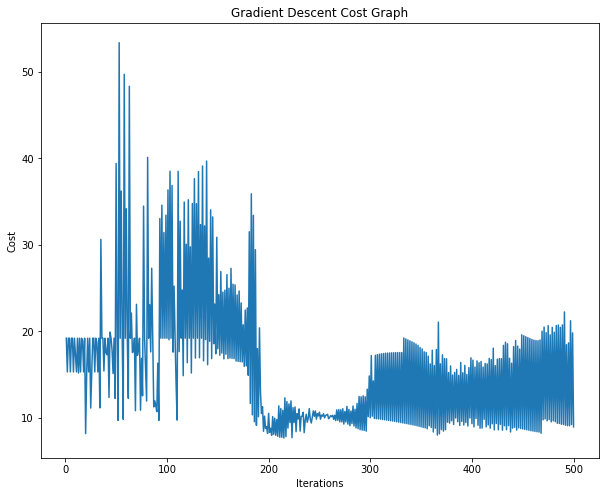

In [10]:
##With gradient descent and threshold as 0.5 and learning reate=0.01
model = LogisticRegressionGD(learning_rate=0.01, n_iters=500,threshold=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.925531914893617


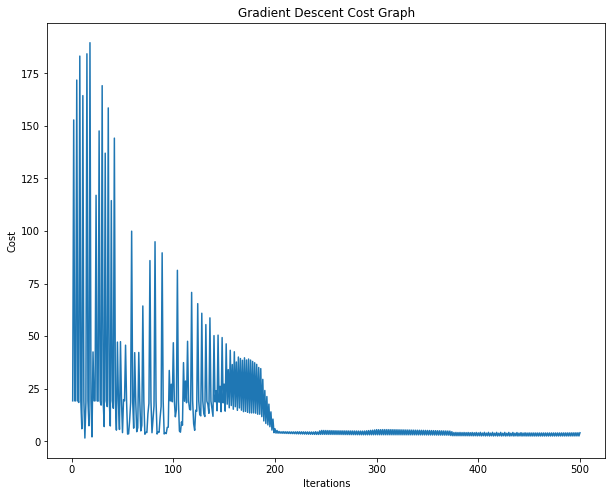

In [11]:
##With gradient descent and threshold as 0.5 and learning reate=0.001
model = LogisticRegressionGD(learning_rate=0.001, n_iters=500,threshold=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.824468085106383


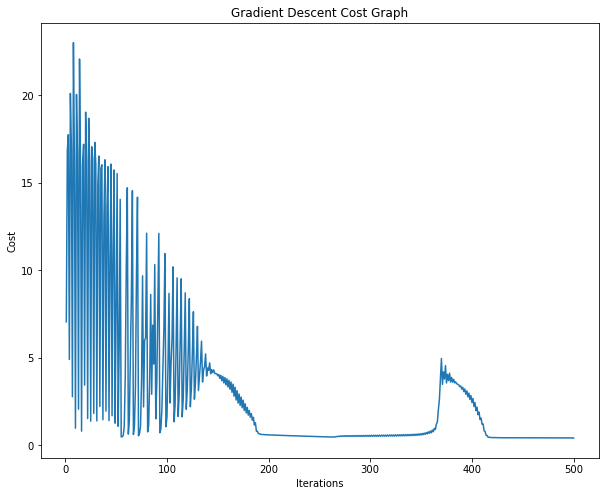

In [12]:
##With gradient descent and threshold as 0.5 and learning reate=0.0001
model = LogisticRegressionGD(learning_rate=0.0001, n_iters=500,threshold=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.7872340425531915


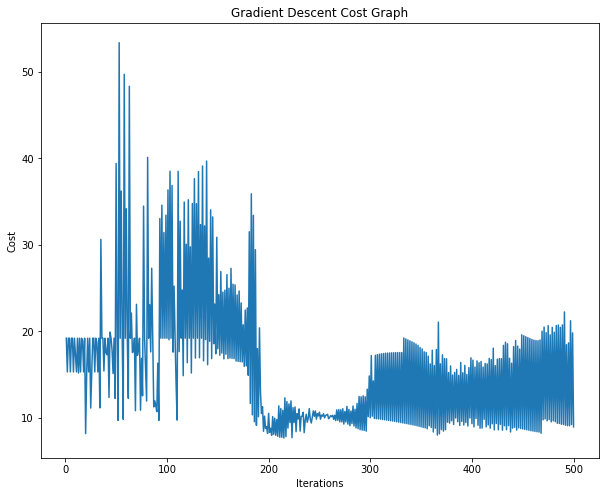

In [13]:
##With gradient descent and threshold as 0.3 and learning reate=0.01
model = LogisticRegressionGD(learning_rate=0.01, n_iters=500,threshold=0.3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.925531914893617


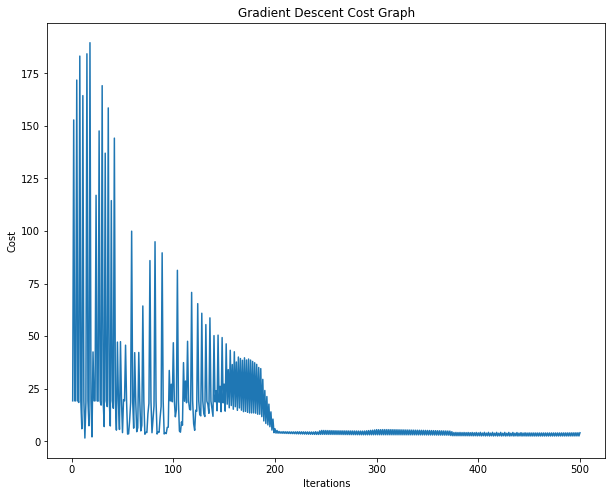

In [14]:
##With gradient descent and threshold as 0.3 and learning reate=0.001
model = LogisticRegressionGD(learning_rate=0.001, n_iters=500,threshold=0.3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.8723404255319149


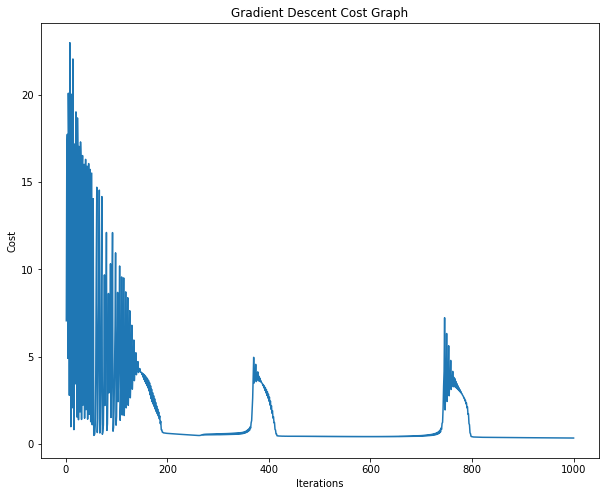

In [15]:
##With gradient descent and threshold as 0.3 and learning reate=0.0001
model = LogisticRegressionGD(learning_rate=0.0001, n_iters=1000,threshold=0.3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.7925531914893617


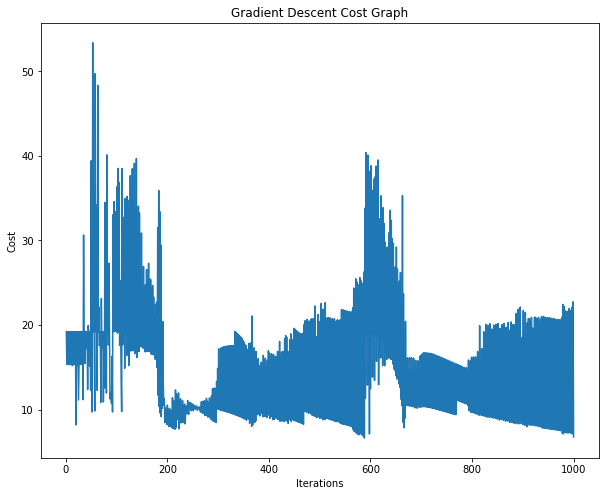

In [16]:
##With gradient descent and threshold as 0.4 and learning reate=0.01
model = LogisticRegressionGD(learning_rate=0.01, n_iters=1000,threshold=0.4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9414893617021277


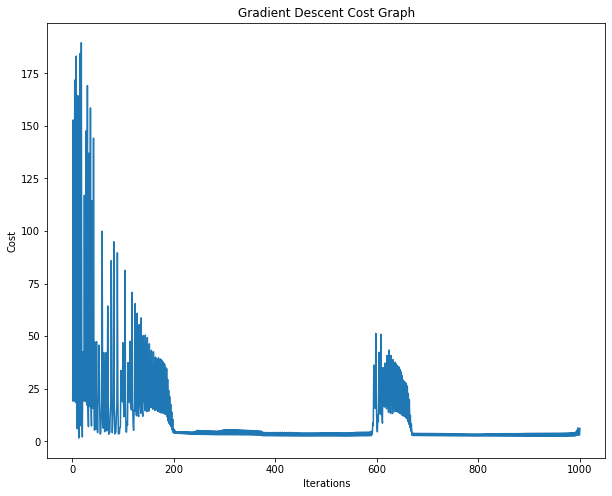

In [17]:
##With gradient descent and threshold as 0.4 and learning reate=0.001
model = LogisticRegressionGD(learning_rate=0.001, n_iters=1000,threshold=0.4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.898936170212766


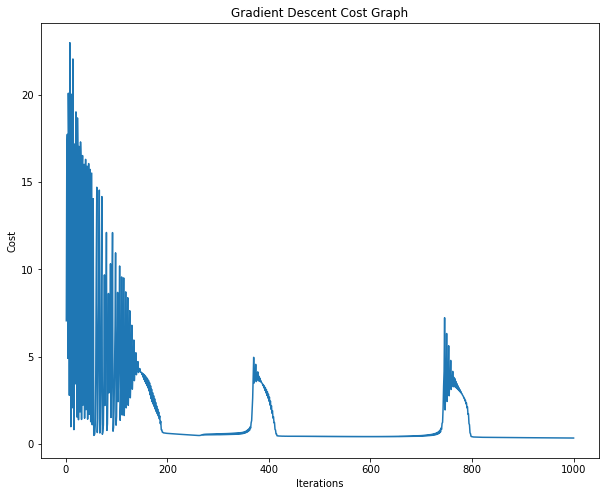

In [18]:
##With gradient descent and threshold as 0.4 and learning reate=0.0001
model = LogisticRegressionGD(learning_rate=0.0001, n_iters=1000,threshold=0.4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.7925531914893617


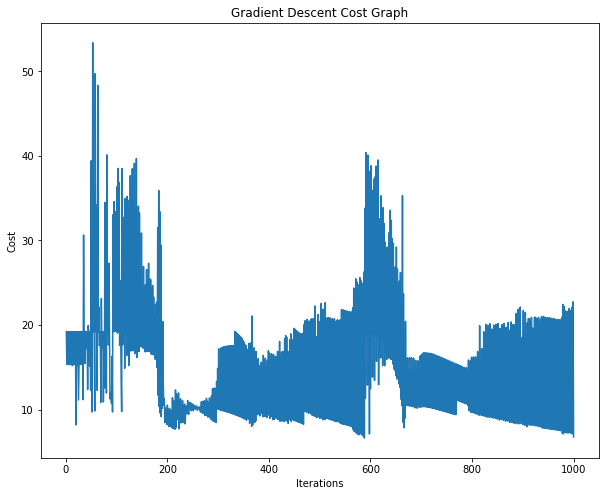

In [19]:
##With gradient descent and threshold as 0.6 and learning reate=0.01
model = LogisticRegressionGD(learning_rate=0.01, n_iters=1000,threshold=0.6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9414893617021277


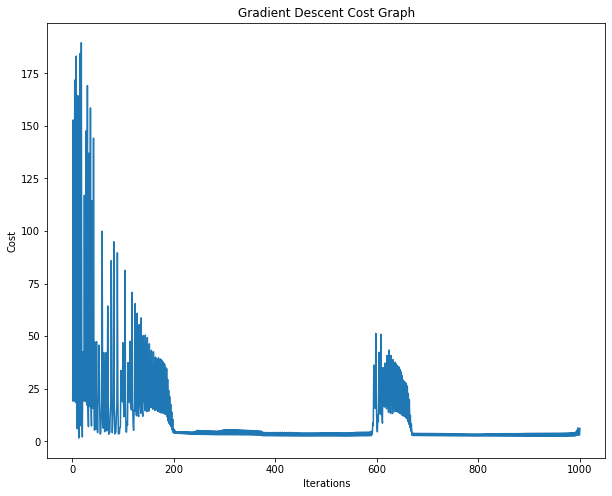

In [20]:
##With gradient descent and threshold as 0.6 and learning reate=0.001
model = LogisticRegressionGD(learning_rate=0.001, n_iters=1000,threshold=0.6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9202127659574468


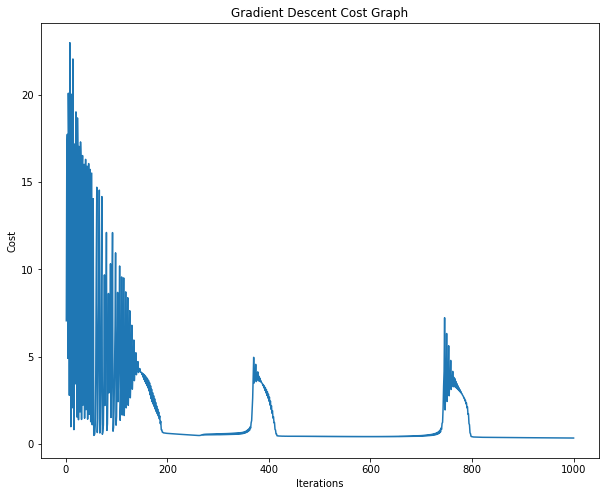

In [21]:
##With gradient descent and threshold as 0.6 and learning reate=0.0001
model = LogisticRegressionGD(learning_rate=0.0001, n_iters=1000,threshold=0.6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.7925531914893617


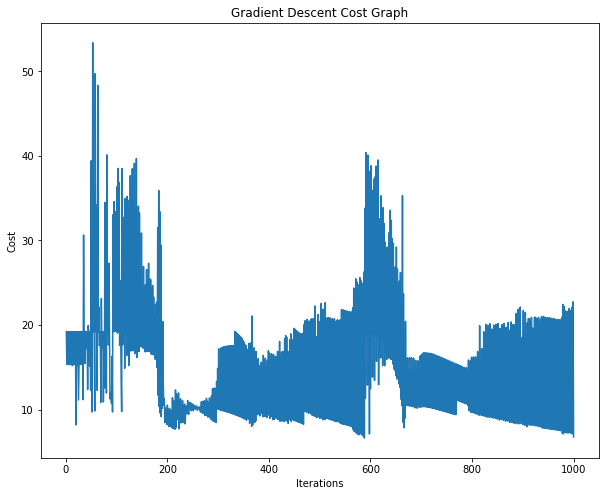

In [22]:
##With gradient descent and threshold as 0.7 and learning reate=0.01
model = LogisticRegressionGD(learning_rate=0.01, n_iters=1000,threshold=0.7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9414893617021277


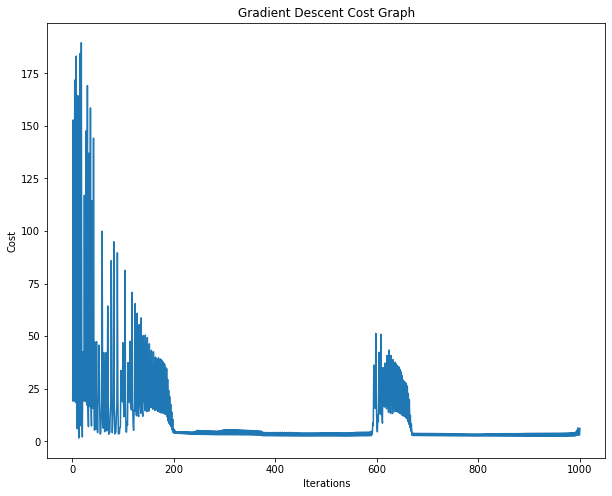

In [23]:
##With gradient descent and threshold as 0.7 and learning reate=0.001
model = LogisticRegressionGD(learning_rate=0.001, n_iters=1000,threshold=0.7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.925531914893617


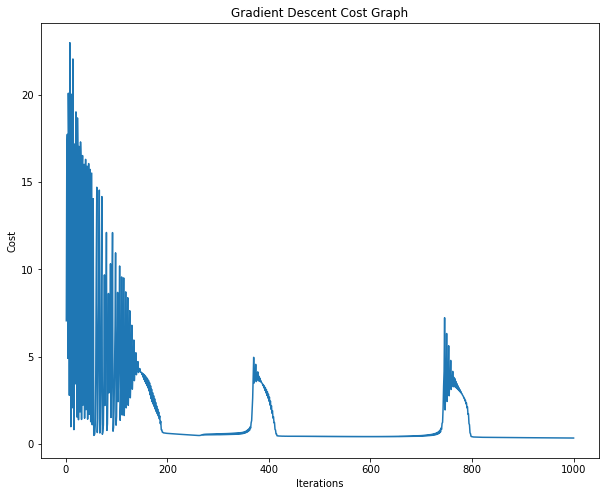

In [24]:
##With gradient descent and threshold as 0.7 and learning reate=0.0001
model = LogisticRegressionGD(learning_rate=0.0001, n_iters=1000,threshold=0.7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.7553191489361702


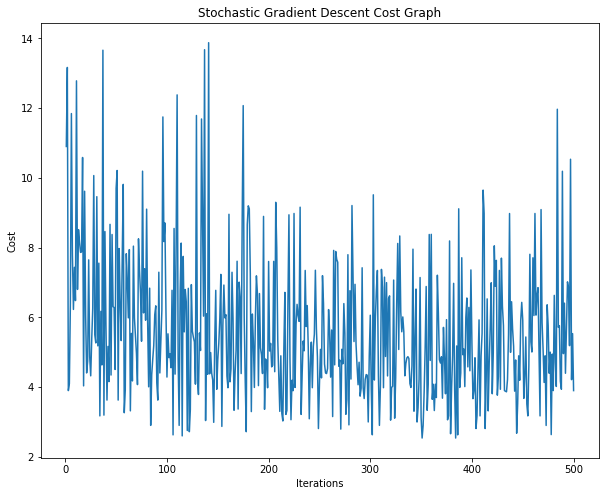

In [25]:
#With SGD and threshold as 0.5 and learning reate=0.01
model = LogisticRegressionSGD(learning_rate=0.01, n_iters=500,threshold=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.8191489361702128


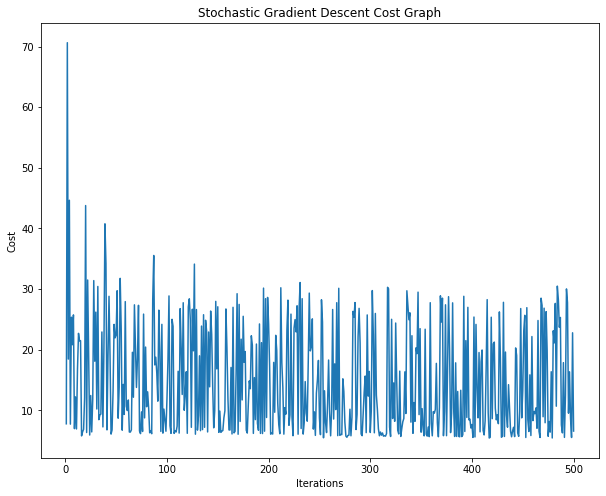

In [26]:
#With SGD and threshold as 0.5 and learning reate=0.001
model = LogisticRegressionSGD(learning_rate=0.001, n_iters=500,threshold=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.6808510638297872


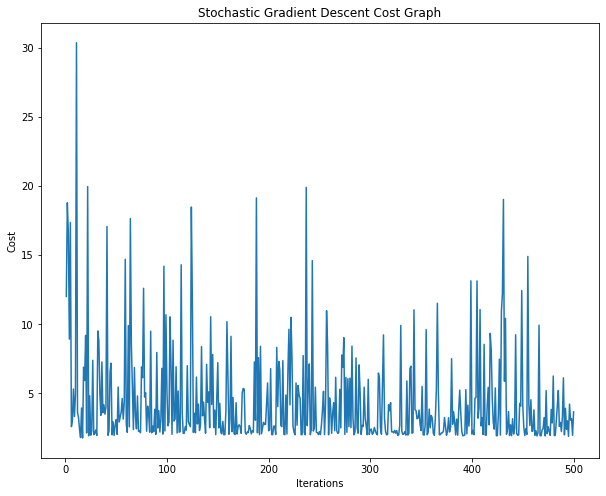

In [27]:
#With SGD and threshold as 0.5 and learning reate=0.0001
model = LogisticRegressionSGD(learning_rate=0.0001, n_iters=500,threshold=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.5585106382978723


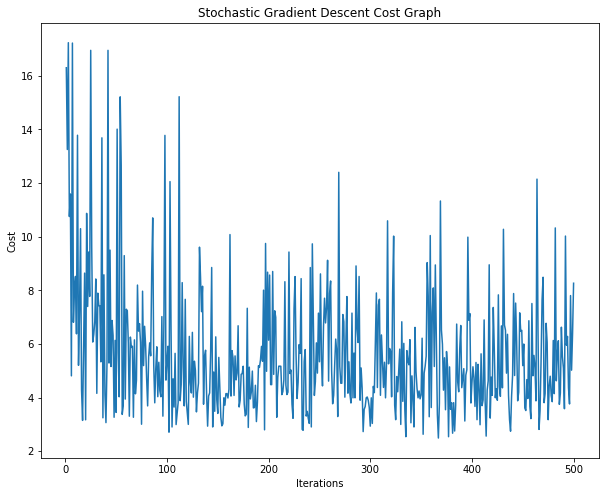

In [28]:
#With SGD and threshold as 0.4 and learning reate=0.01
model = LogisticRegressionSGD(learning_rate=0.01, n_iters=500,threshold=0.4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.8031914893617021


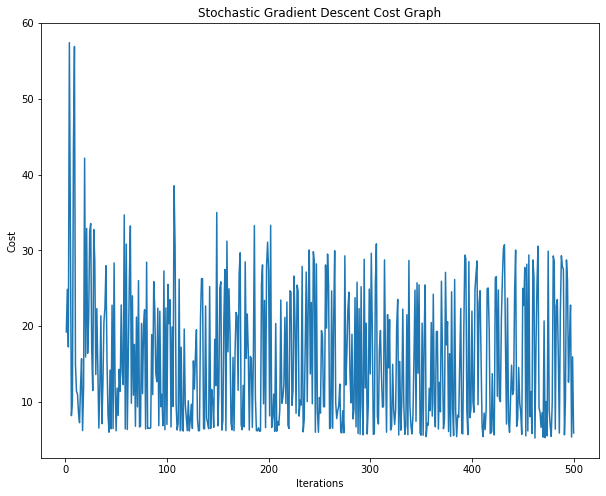

In [29]:
#With SGD and threshold as 0.4 and learning reate=0.001
model = LogisticRegressionSGD(learning_rate=0.001, n_iters=500,threshold=0.4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.925531914893617


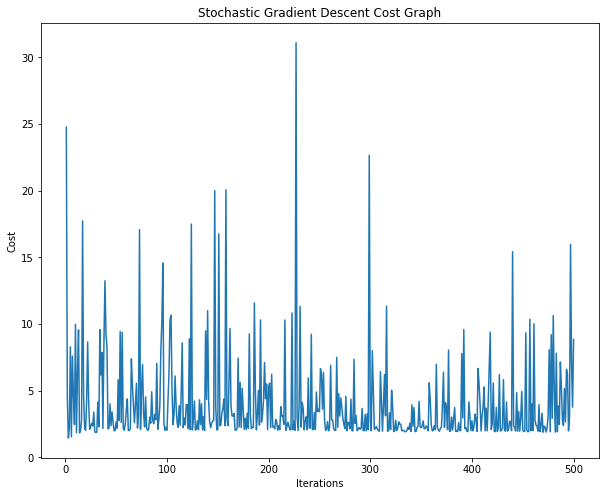

In [30]:
#With SGD and threshold as 0.4 and learning reate=0.0001
model = LogisticRegressionSGD(learning_rate=0.0001, n_iters=500,threshold=0.4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9361702127659575


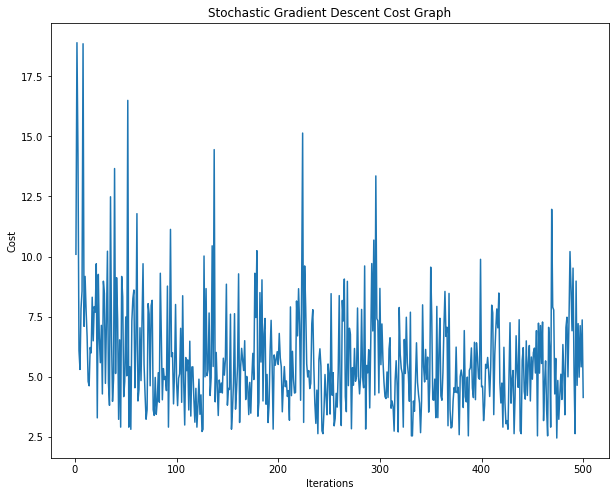

In [31]:
#With SGD and threshold as 0.3 and learning reate=0.01
model = LogisticRegressionSGD(learning_rate=0.01, n_iters=500,threshold=0.3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9042553191489362


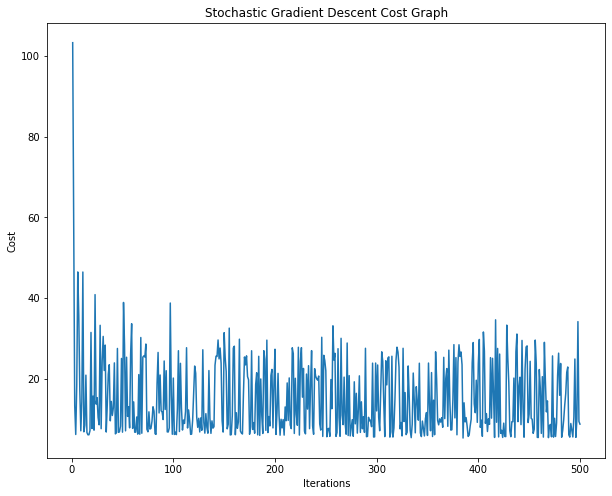

In [32]:
#With SGD and threshold as 0.3 and learning reate=0.01
model = LogisticRegressionSGD(learning_rate=0.001, n_iters=500,threshold=0.3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.5478723404255319


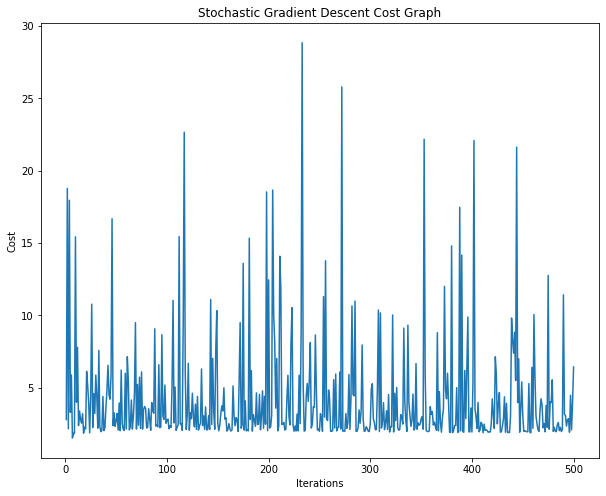

In [33]:
#With SGD and threshold as 0.3 and learning reate=0.0001
model = LogisticRegressionSGD(learning_rate=0.0001, n_iters=500,threshold=0.3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.8351063829787234


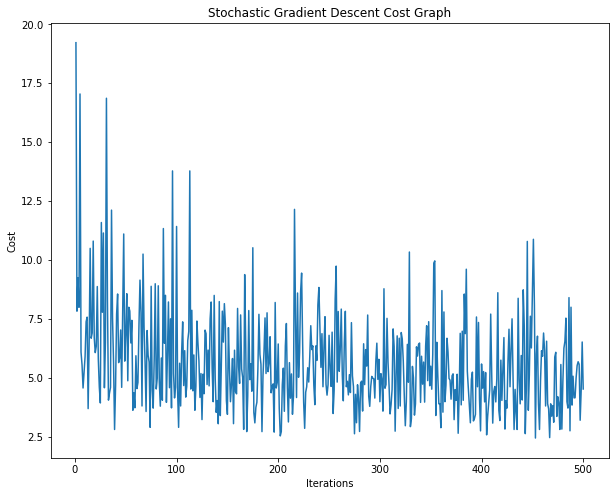

In [34]:
#With SGD and threshold as 0.6 and learning reate=0.01
model = LogisticRegressionSGD(learning_rate=0.01, n_iters=500,threshold=0.6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9202127659574468


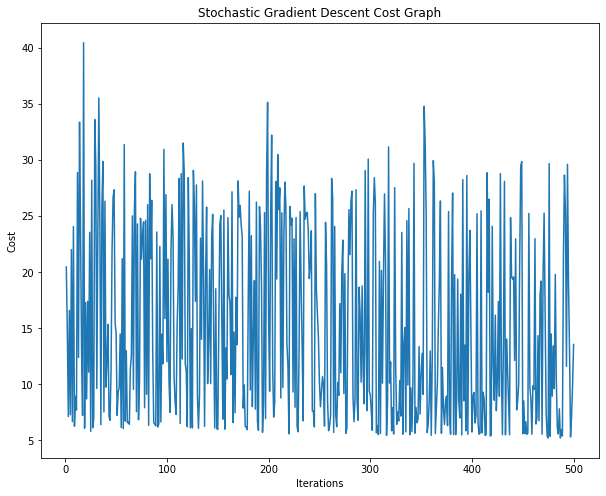

In [35]:
#With SGD and threshold as 0.6 and learning reate=0.01
model = LogisticRegressionSGD(learning_rate=0.001, n_iters=500,threshold=0.6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.8297872340425532


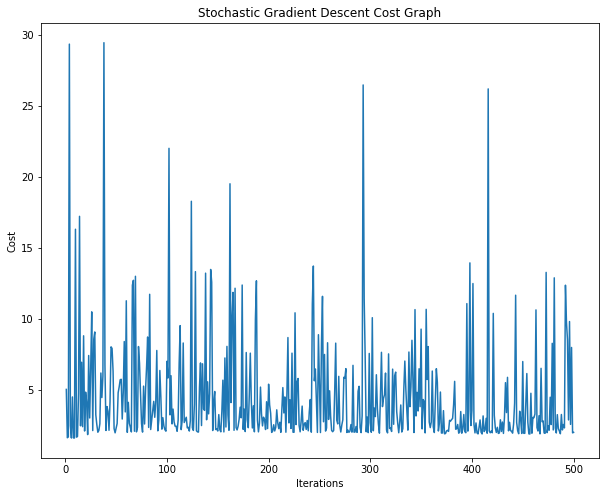

In [36]:
#With SGD and threshold as 0.6 and learning reate=0.0001
model = LogisticRegressionSGD(learning_rate=0.0001, n_iters=500,threshold=0.6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.8670212765957447


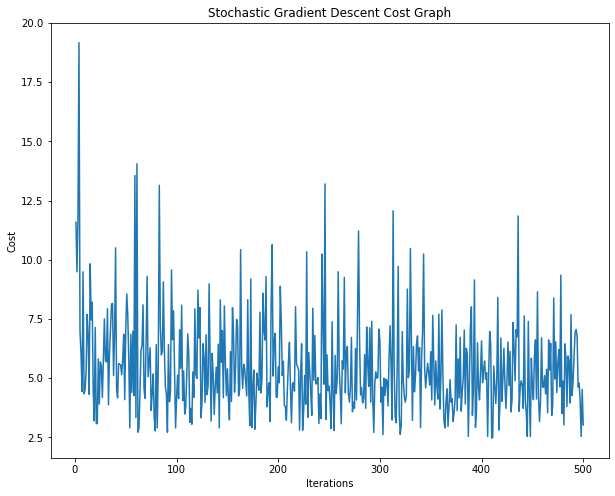

In [37]:
#With SGD and threshold as 0.7 and learning reate=0.01
model = LogisticRegressionSGD(learning_rate=0.01, n_iters=500,threshold=0.7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9468085106382979


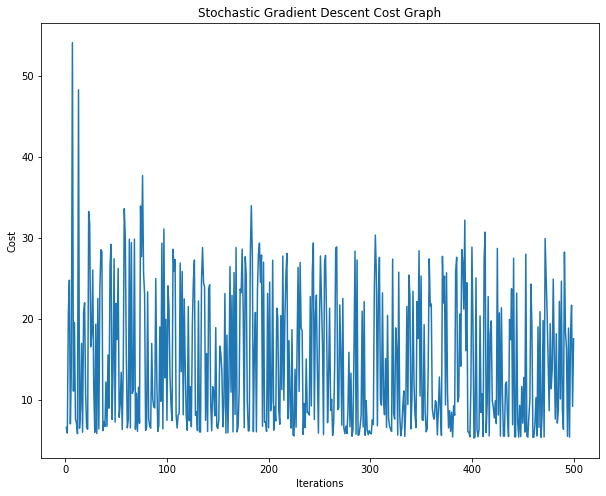

In [38]:
#With SGD and threshold as 0.7 and learning reate=0.001
model = LogisticRegressionSGD(learning_rate=0.001, n_iters=500,threshold=0.7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9202127659574468


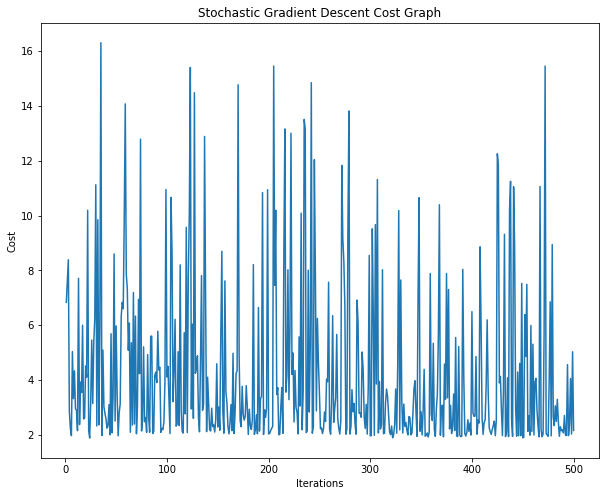

In [39]:
#With SGD and threshold as 0.7 and learning reate=0.0001
model = LogisticRegressionSGD(learning_rate=0.0001, n_iters=500,threshold=0.7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.8670212765957447


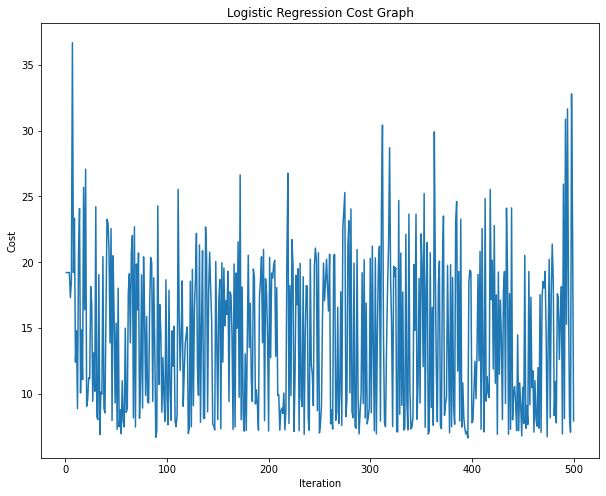

In [40]:
##With gradient descent and threshold as 0.5 and learning reate=0.01
model = LogisticRegressionMiniBatchGD(learning_rate=0.01, n_iters=500,threshold=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.8563829787234043


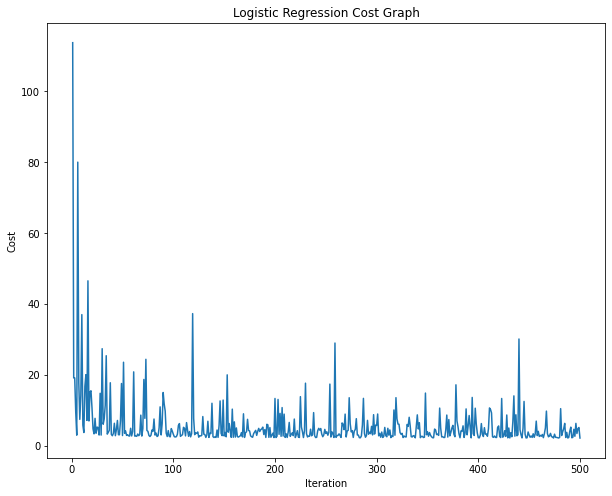

In [41]:
##With gradient descent and threshold as 0.5 and learning reate=0.001
model = LogisticRegressionMiniBatchGD(learning_rate=0.001, n_iters=500,threshold=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.925531914893617


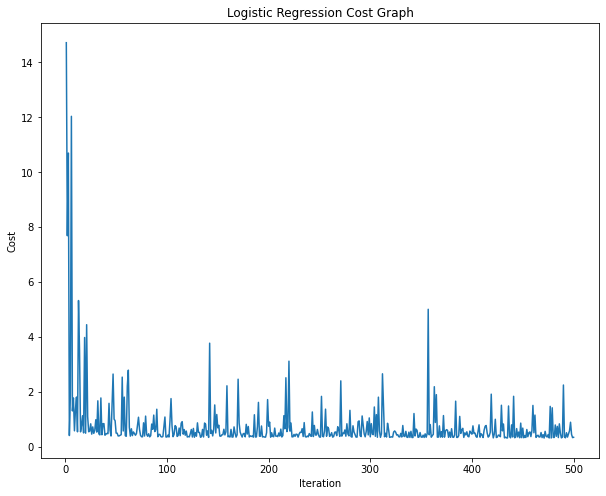

In [42]:
##With gradient descent and threshold as 0.5 and learning reate=0.0001
model = LogisticRegressionMiniBatchGD(learning_rate=0.0001, n_iters=500,threshold=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9361702127659575


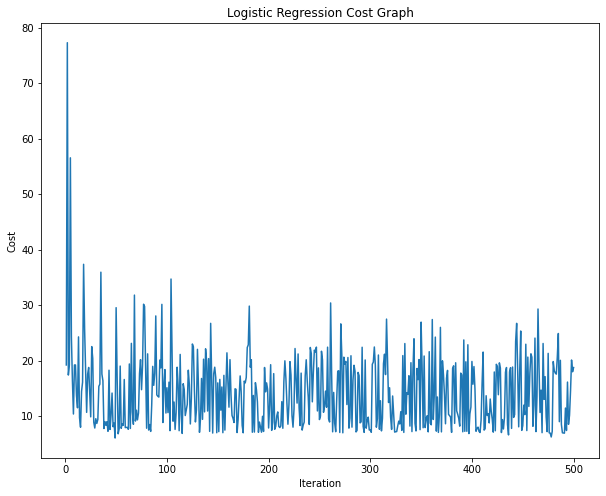

In [43]:
##With gradient descent and threshold as 0.6 and learning reate=0.01
model = LogisticRegressionMiniBatchGD(learning_rate=0.01, n_iters=500,threshold=0.6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.8031914893617021


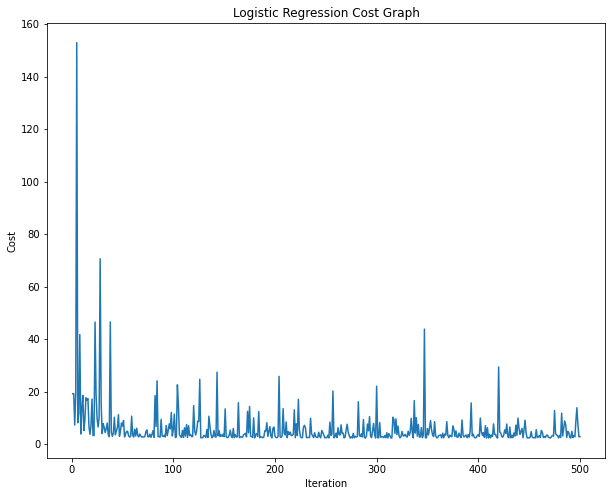

In [44]:
##With gradient descent and threshold as 0.6 and learning reate=0.001
model = LogisticRegressionMiniBatchGD(learning_rate=0.001, n_iters=500,threshold=0.6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.8617021276595744


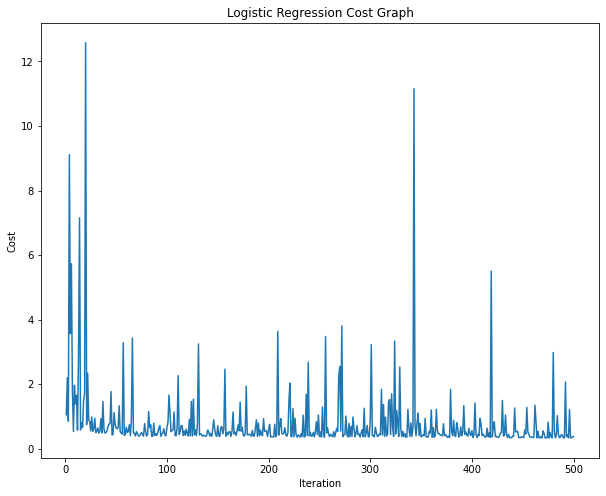

In [45]:
##With gradient descent and threshold as 0.6 and learning reate=0.0001
model = LogisticRegressionMiniBatchGD(learning_rate=0.0001, n_iters=500,threshold=0.6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9361702127659575


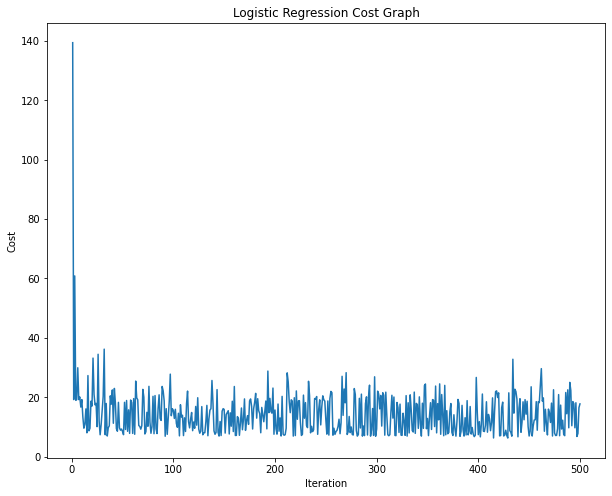

In [46]:
##With gradient descent and threshold as 0.7 and learning reate=0.01
model = LogisticRegressionMiniBatchGD(learning_rate=0.01, n_iters=500,threshold=0.7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9361702127659575


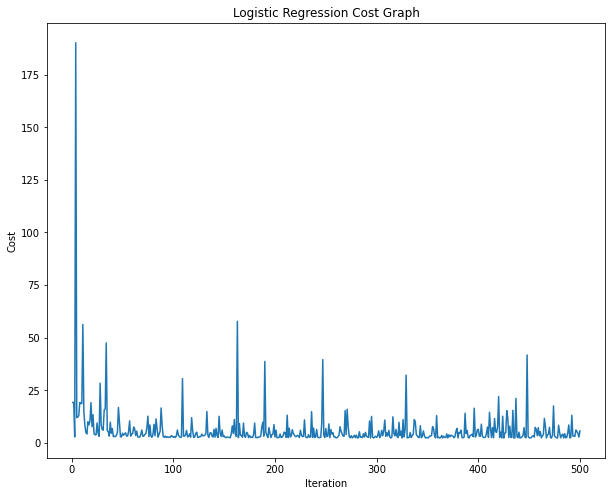

In [47]:
##With gradient descent and threshold as 0.7 and learning reate=0.001
model = LogisticRegressionMiniBatchGD(learning_rate=0.001, n_iters=500,threshold=0.7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.8882978723404256


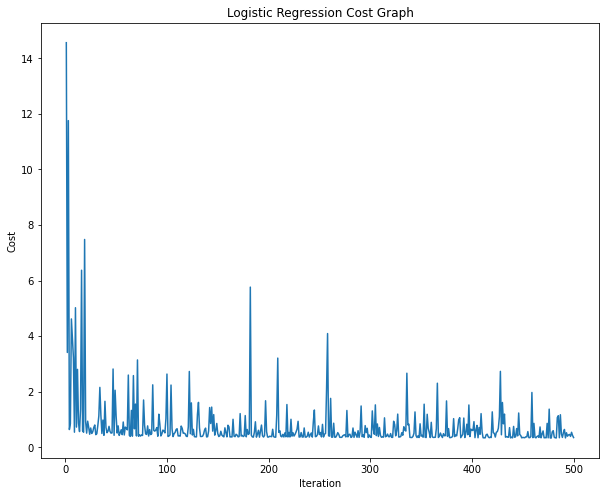

In [48]:
##With gradient descent and threshold as 0.7 and learning reate=0.0001
model = LogisticRegressionMiniBatchGD(learning_rate=0.0001, n_iters=500,threshold=0.7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.8882978723404256


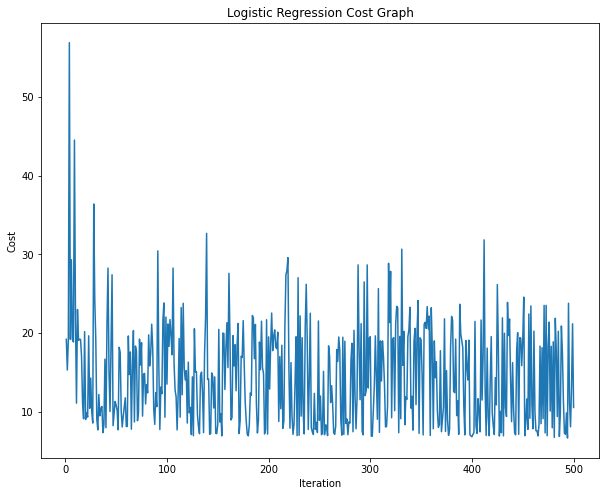

In [49]:
##With gradient descent and threshold as 0.4 and learning reate=0.01
model = LogisticRegressionMiniBatchGD(learning_rate=0.01, n_iters=500,threshold=0.4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.8617021276595744


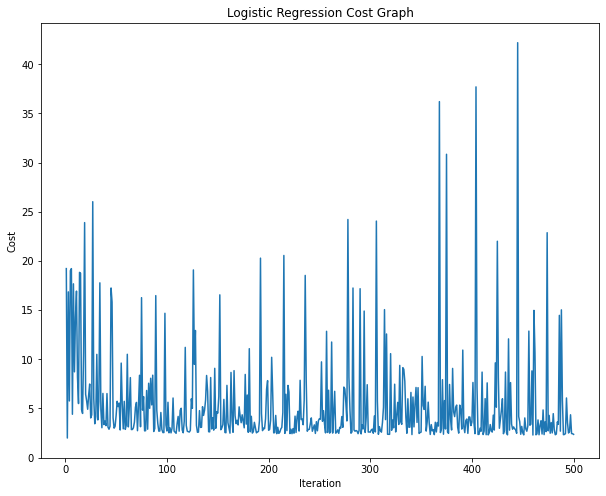

In [50]:
##With gradient descent and threshold as 0.4 and learning reate=0.001
model = LogisticRegressionMiniBatchGD(learning_rate=0.001, n_iters=500,threshold=0.4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9361702127659575


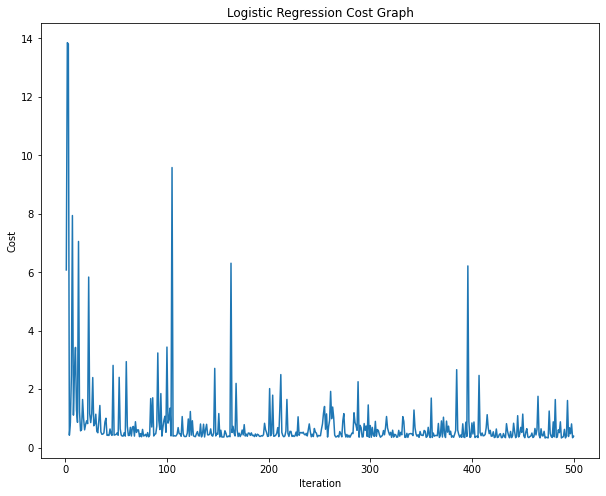

In [51]:
##With gradient descent and threshold as 0.4 and learning reate=0.0001
model = LogisticRegressionMiniBatchGD(learning_rate=0.0001, n_iters=500,threshold=0.4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9042553191489362


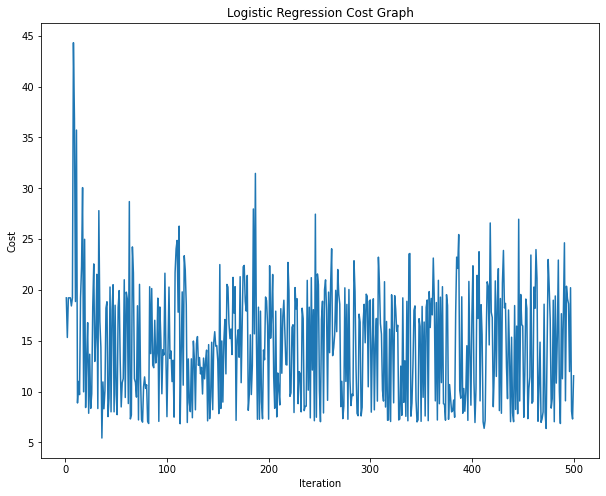

In [52]:
##With gradient descent and threshold as 0.3 and learning reate=0.01
model = LogisticRegressionMiniBatchGD(learning_rate=0.01, n_iters=500,threshold=0.3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9361702127659575


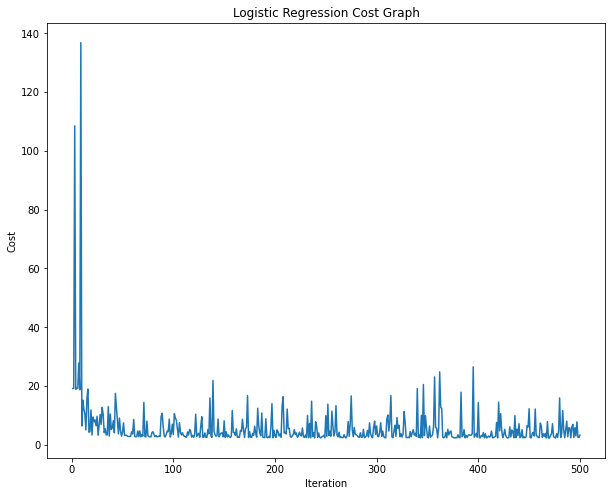

In [53]:
##With gradient descent and threshold as 0.3 and learning reate=0.001
model = LogisticRegressionMiniBatchGD(learning_rate=0.001, n_iters=500,threshold=0.3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.75


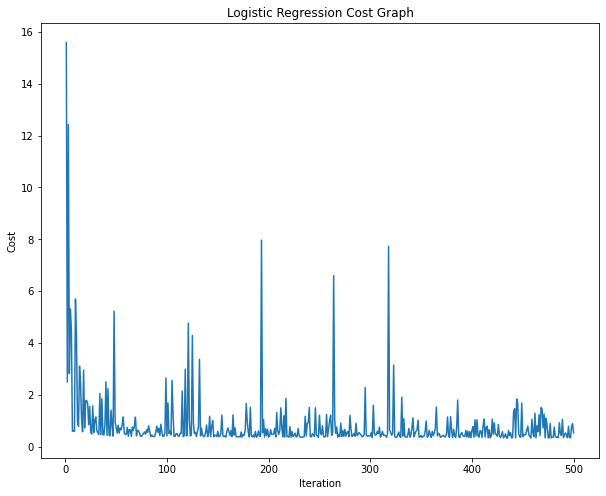

In [54]:
##With gradient descent and threshold as 0.3 and learning reate=0.0001
model = LogisticRegressionMiniBatchGD(learning_rate=0.0001, n_iters=500,threshold=0.3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()